In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

170508288/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
categories = ['airplane' , 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
from matplotlib.cbook import flatten
model = keras.Sequential([
    keras.Input(shape=(32,32,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [5]:
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.001),
    loss= keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [6]:
train_images_norm = train_images.astype('float32') / 255
test_images_norm = test_images.astype('float32') / 255

In [7]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=10, batch_size=128, validation_split=0.3)

Epoch 1/10
274/274 [==============================] - 15s 21ms/step - loss: 2.3045 - accuracy: 0.1013 - val_loss: 2.3027 - val_accuracy: 0.0979
Epoch 2/10
274/274 [==============================] - 5s 18ms/step - loss: 2.3003 - accuracy: 0.1026 - val_loss: 2.2991 - val_accuracy: 0.0995
Epoch 3/10
274/274 [==============================] - 5s 19ms/step - loss: 2.2971 - accuracy: 0.1060 - val_loss: 2.2960 - val_accuracy: 0.1056
Epoch 4/10
274/274 [==============================] - 5s 19ms/step - loss: 2.2943 - accuracy: 0.1105 - val_loss: 2.2931 - val_accuracy: 0.1167
Epoch 5/10
274/274 [==============================] - 5s 19ms/step - loss: 2.2914 - accuracy: 0.1236 - val_loss: 2.2902 - val_accuracy: 0.1277
Epoch 6/10
274/274 [==============================] - 5s 17ms/step - loss: 2.2883 - accuracy: 0.1382 - val_loss: 2.2867 - val_accuracy: 0.1453
Epoch 7/10
274/274 [==============================] - 5s 17ms/step - loss: 2.2847 - accuracy: 0.1566 - val_loss: 2.2828 - val_accuracy: 0.169

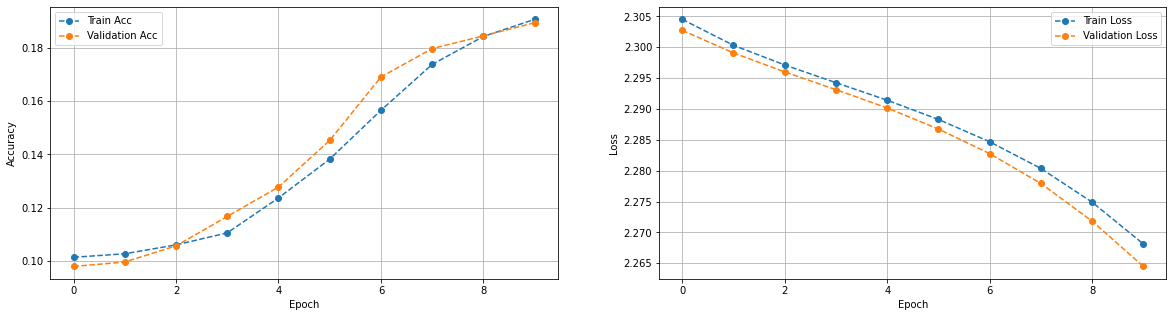

In [8]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [9]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=15, batch_size=128, validation_split=0.3)

Epoch 1/15
274/274 [==============================] - 5s 20ms/step - loss: 2.2600 - accuracy: 0.1940 - val_loss: 2.2555 - val_accuracy: 0.1947
Epoch 2/15
274/274 [==============================] - 5s 17ms/step - loss: 2.2500 - accuracy: 0.1952 - val_loss: 2.2445 - val_accuracy: 0.1969
Epoch 3/15
274/274 [==============================] - 5s 17ms/step - loss: 2.2374 - accuracy: 0.1969 - val_loss: 2.2303 - val_accuracy: 0.1989
Epoch 4/15
274/274 [==============================] - 5s 19ms/step - loss: 2.2213 - accuracy: 0.2008 - val_loss: 2.2125 - val_accuracy: 0.1966
Epoch 5/15
274/274 [==============================] - 5s 17ms/step - loss: 2.2011 - accuracy: 0.1997 - val_loss: 2.1900 - val_accuracy: 0.2021
Epoch 6/15
274/274 [==============================] - 5s 19ms/step - loss: 2.1757 - accuracy: 0.2030 - val_loss: 2.1617 - val_accuracy: 0.2057
Epoch 7/15
274/274 [==============================] - 5s 19ms/step - loss: 2.1439 - accuracy: 0.2207 - val_loss: 2.1293 - val_accuracy: 0.2463

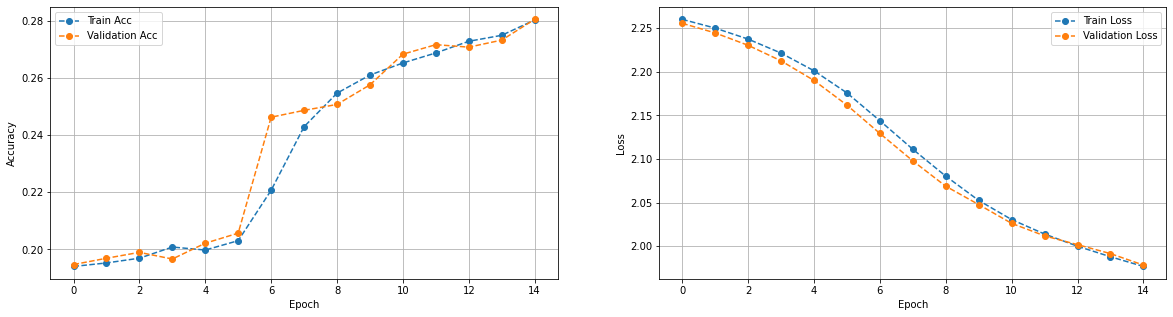

In [10]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [11]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=20, batch_size=128, validation_split=0.3)

Epoch 1/20
274/274 [==============================] - 5s 18ms/step - loss: 1.9660 - accuracy: 0.2833 - val_loss: 1.9741 - val_accuracy: 0.2808
Epoch 2/20
274/274 [==============================] - 5s 19ms/step - loss: 1.9561 - accuracy: 0.2867 - val_loss: 1.9604 - val_accuracy: 0.2887
Epoch 3/20
274/274 [==============================] - 5s 19ms/step - loss: 1.9458 - accuracy: 0.2904 - val_loss: 1.9480 - val_accuracy: 0.2914
Epoch 4/20
274/274 [==============================] - 5s 19ms/step - loss: 1.9367 - accuracy: 0.2937 - val_loss: 1.9407 - val_accuracy: 0.2965
Epoch 5/20
274/274 [==============================] - 5s 17ms/step - loss: 1.9269 - accuracy: 0.2985 - val_loss: 1.9291 - val_accuracy: 0.2975
Epoch 6/20
274/274 [==============================] - 5s 19ms/step - loss: 1.9174 - accuracy: 0.3003 - val_loss: 1.9202 - val_accuracy: 0.3018
Epoch 7/20
274/274 [==============================] - 5s 19ms/step - loss: 1.9071 - accuracy: 0.3039 - val_loss: 1.9090 - val_accuracy: 0.3053

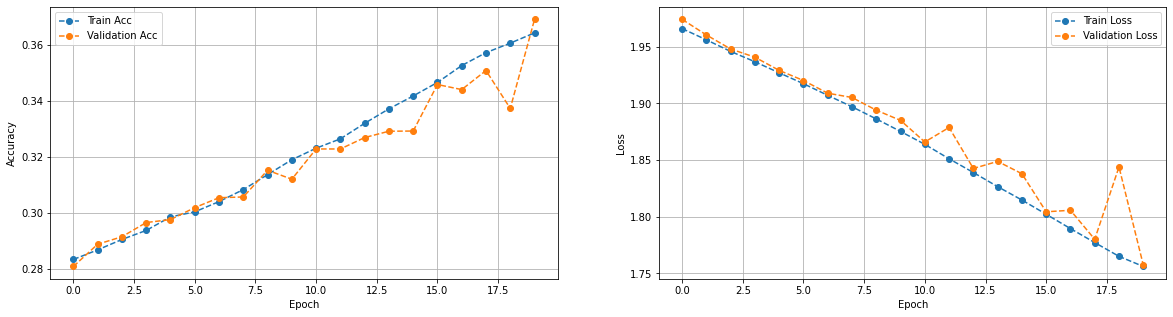

In [12]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [13]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=25, batch_size=128, validation_split=0.3)

Epoch 1/25
274/274 [==============================] - 5s 20ms/step - loss: 1.7405 - accuracy: 0.3726 - val_loss: 1.7615 - val_accuracy: 0.3639
Epoch 2/25
274/274 [==============================] - 5s 17ms/step - loss: 1.7318 - accuracy: 0.3733 - val_loss: 1.7382 - val_accuracy: 0.3703
Epoch 3/25
274/274 [==============================] - 5s 17ms/step - loss: 1.7199 - accuracy: 0.3767 - val_loss: 1.8368 - val_accuracy: 0.3493
Epoch 4/25
274/274 [==============================] - 5s 17ms/step - loss: 1.7121 - accuracy: 0.3823 - val_loss: 1.7143 - val_accuracy: 0.3769
Epoch 5/25
274/274 [==============================] - 5s 19ms/step - loss: 1.7013 - accuracy: 0.3873 - val_loss: 1.7377 - val_accuracy: 0.3737
Epoch 6/25
274/274 [==============================] - 5s 19ms/step - loss: 1.6929 - accuracy: 0.3893 - val_loss: 1.6979 - val_accuracy: 0.3872
Epoch 7/25
274/274 [==============================] - 5s 17ms/step - loss: 1.6838 - accuracy: 0.3947 - val_loss: 1.6879 - val_accuracy: 0.3824

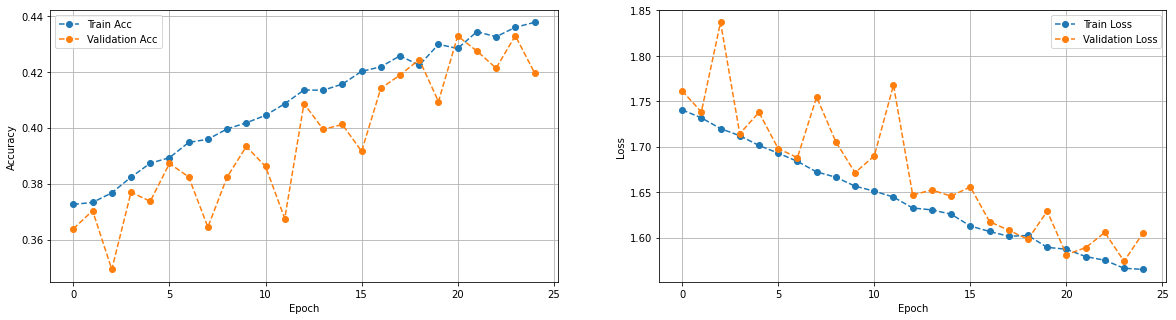

In [14]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [15]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=30, batch_size=128, validation_split=0.3)

Epoch 1/30
274/274 [==============================] - 5s 20ms/step - loss: 1.5584 - accuracy: 0.4397 - val_loss: 1.5885 - val_accuracy: 0.4209
Epoch 2/30
274/274 [==============================] - 5s 17ms/step - loss: 1.5558 - accuracy: 0.4423 - val_loss: 1.6172 - val_accuracy: 0.4150
Epoch 3/30
274/274 [==============================] - 5s 17ms/step - loss: 1.5443 - accuracy: 0.4455 - val_loss: 1.5720 - val_accuracy: 0.4275
Epoch 4/30
274/274 [==============================] - 5s 17ms/step - loss: 1.5429 - accuracy: 0.4447 - val_loss: 1.5607 - val_accuracy: 0.4362
Epoch 5/30
274/274 [==============================] - 5s 17ms/step - loss: 1.5413 - accuracy: 0.4459 - val_loss: 1.5519 - val_accuracy: 0.4396
Epoch 6/30
274/274 [==============================] - 5s 19ms/step - loss: 1.5342 - accuracy: 0.4479 - val_loss: 1.5515 - val_accuracy: 0.4424
Epoch 7/30
274/274 [==============================] - 5s 17ms/step - loss: 1.5281 - accuracy: 0.4514 - val_loss: 1.5533 - val_accuracy: 0.4381

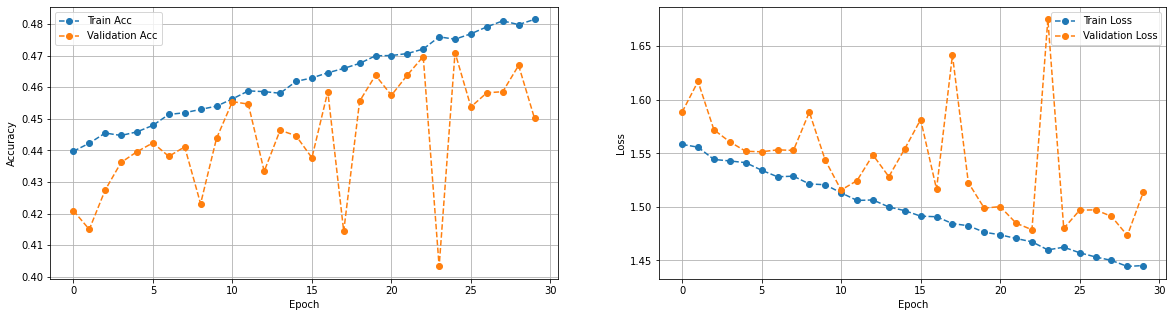

In [16]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [17]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=35, batch_size=128, validation_split=0.3)

Epoch 1/35
274/274 [==============================] - 5s 18ms/step - loss: 1.4380 - accuracy: 0.4819 - val_loss: 1.4627 - val_accuracy: 0.4741
Epoch 2/35
274/274 [==============================] - 5s 17ms/step - loss: 1.4343 - accuracy: 0.4841 - val_loss: 1.4551 - val_accuracy: 0.4770
Epoch 3/35
274/274 [==============================] - 5s 19ms/step - loss: 1.4355 - accuracy: 0.4854 - val_loss: 1.5888 - val_accuracy: 0.4343
Epoch 4/35
274/274 [==============================] - 5s 17ms/step - loss: 1.4320 - accuracy: 0.4868 - val_loss: 1.5313 - val_accuracy: 0.4558
Epoch 5/35
274/274 [==============================] - 5s 17ms/step - loss: 1.4270 - accuracy: 0.4872 - val_loss: 1.4687 - val_accuracy: 0.4720
Epoch 6/35
274/274 [==============================] - 5s 17ms/step - loss: 1.4254 - accuracy: 0.4871 - val_loss: 1.4676 - val_accuracy: 0.4719
Epoch 7/35
274/274 [==============================] - 5s 19ms/step - loss: 1.4187 - accuracy: 0.4927 - val_loss: 1.4780 - val_accuracy: 0.4701

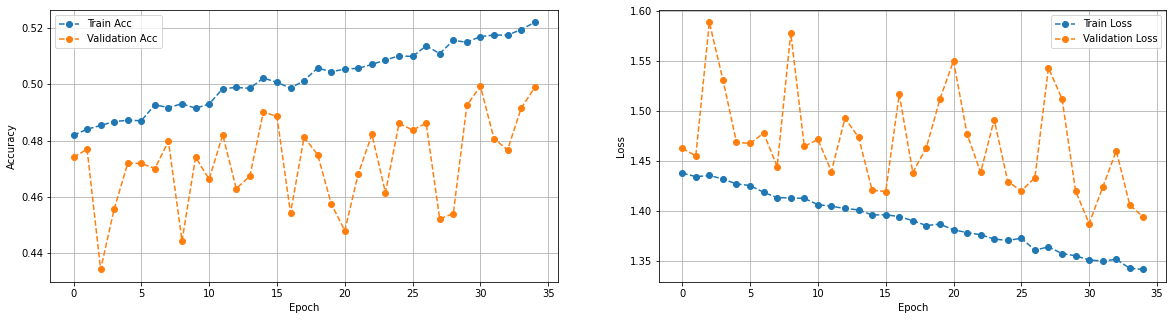

In [18]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [19]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=40, batch_size=128, validation_split=0.3)

Epoch 1/40
274/274 [==============================] - 5s 18ms/step - loss: 1.3413 - accuracy: 0.5200 - val_loss: 1.3769 - val_accuracy: 0.5063
Epoch 2/40
274/274 [==============================] - 5s 19ms/step - loss: 1.3343 - accuracy: 0.5238 - val_loss: 1.3755 - val_accuracy: 0.5055
Epoch 3/40
274/274 [==============================] - 5s 17ms/step - loss: 1.3344 - accuracy: 0.5230 - val_loss: 1.3759 - val_accuracy: 0.5063
Epoch 4/40
274/274 [==============================] - 5s 17ms/step - loss: 1.3341 - accuracy: 0.5248 - val_loss: 1.3866 - val_accuracy: 0.5021
Epoch 5/40
274/274 [==============================] - 5s 17ms/step - loss: 1.3306 - accuracy: 0.5263 - val_loss: 1.3671 - val_accuracy: 0.5083
Epoch 6/40
274/274 [==============================] - 5s 17ms/step - loss: 1.3284 - accuracy: 0.5260 - val_loss: 1.3783 - val_accuracy: 0.5073
Epoch 7/40
274/274 [==============================] - 5s 19ms/step - loss: 1.3275 - accuracy: 0.5272 - val_loss: 1.3682 - val_accuracy: 0.5105

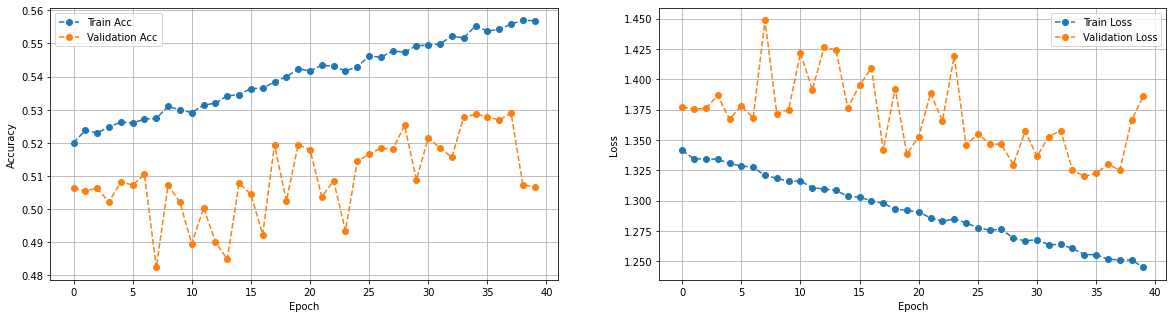

In [20]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [21]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=45, batch_size=128, validation_split=0.3)

Epoch 1/45
274/274 [==============================] - 5s 18ms/step - loss: 1.2412 - accuracy: 0.5580 - val_loss: 1.3300 - val_accuracy: 0.5249
Epoch 2/45
274/274 [==============================] - 5s 17ms/step - loss: 1.2421 - accuracy: 0.5589 - val_loss: 1.3209 - val_accuracy: 0.5263
Epoch 3/45
274/274 [==============================] - 5s 19ms/step - loss: 1.2409 - accuracy: 0.5596 - val_loss: 1.3328 - val_accuracy: 0.5153
Epoch 4/45
274/274 [==============================] - 5s 19ms/step - loss: 1.2393 - accuracy: 0.5619 - val_loss: 1.3327 - val_accuracy: 0.5236
Epoch 5/45
274/274 [==============================] - 5s 19ms/step - loss: 1.2382 - accuracy: 0.5613 - val_loss: 1.3840 - val_accuracy: 0.5103
Epoch 6/45
274/274 [==============================] - 5s 17ms/step - loss: 1.2336 - accuracy: 0.5627 - val_loss: 1.3770 - val_accuracy: 0.5085
Epoch 7/45
274/274 [==============================] - 5s 17ms/step - loss: 1.2306 - accuracy: 0.5650 - val_loss: 1.3412 - val_accuracy: 0.5155

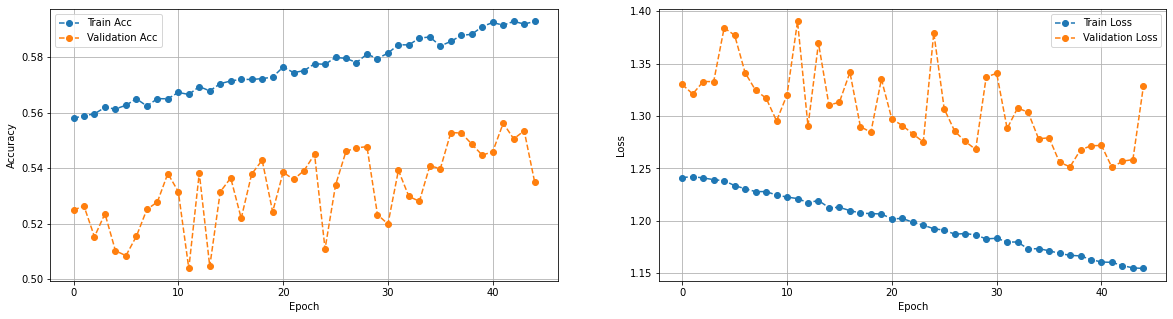

In [22]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [23]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=50, batch_size=128, validation_split=0.3)

Epoch 1/50
274/274 [==============================] - 5s 18ms/step - loss: 1.1513 - accuracy: 0.5939 - val_loss: 1.2539 - val_accuracy: 0.5546
Epoch 2/50
274/274 [==============================] - 5s 19ms/step - loss: 1.1513 - accuracy: 0.5941 - val_loss: 1.2622 - val_accuracy: 0.5544
Epoch 3/50
274/274 [==============================] - 5s 19ms/step - loss: 1.1479 - accuracy: 0.5929 - val_loss: 1.2882 - val_accuracy: 0.5443
Epoch 4/50
274/274 [==============================] - 5s 17ms/step - loss: 1.1468 - accuracy: 0.5955 - val_loss: 1.2515 - val_accuracy: 0.5583
Epoch 5/50
274/274 [==============================] - 5s 17ms/step - loss: 1.1438 - accuracy: 0.5978 - val_loss: 1.3008 - val_accuracy: 0.5390
Epoch 6/50
274/274 [==============================] - 5s 17ms/step - loss: 1.1441 - accuracy: 0.5970 - val_loss: 1.2483 - val_accuracy: 0.5590
Epoch 7/50
274/274 [==============================] - 5s 17ms/step - loss: 1.1376 - accuracy: 0.5999 - val_loss: 1.2649 - val_accuracy: 0.5461

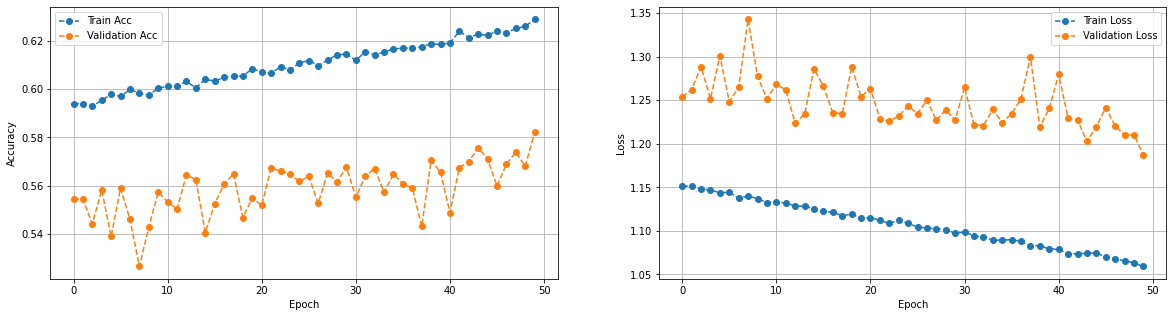

In [24]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()